# Obtención y preparación de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


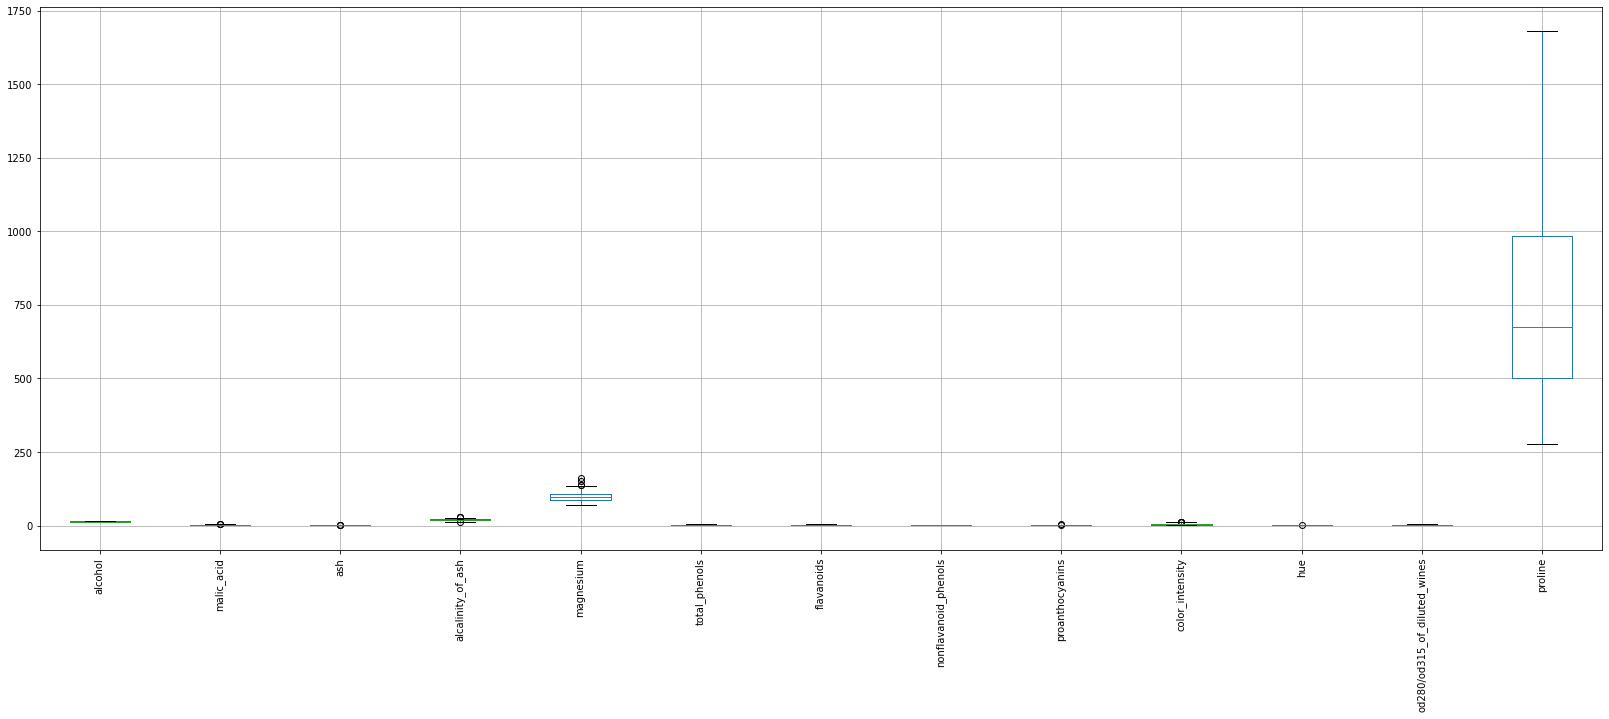

In [5]:
df.boxplot(figsize=(28,10))
plt.xticks(rotation = 90)
plt.show()

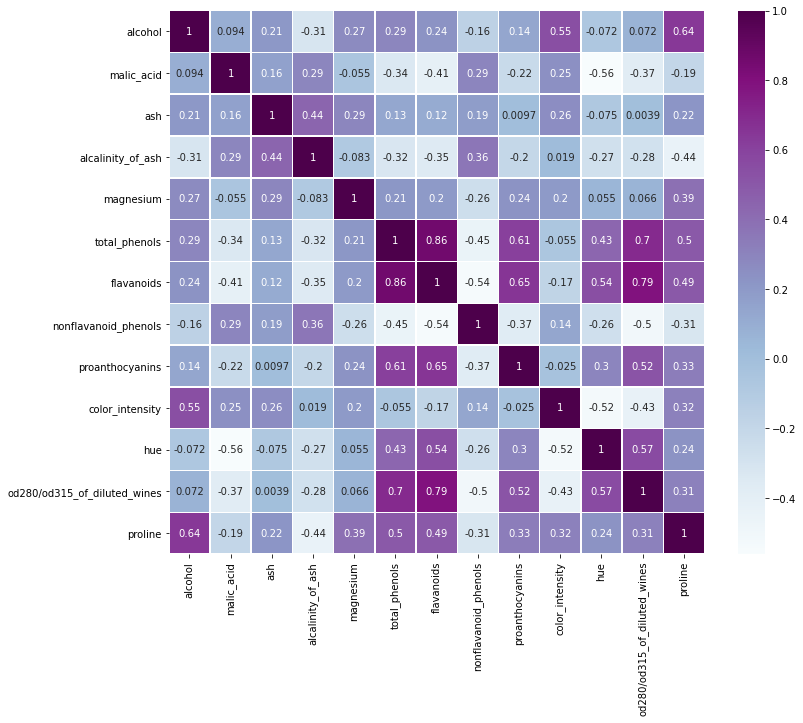

In [6]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, linewidth=0.5,annot=True,cmap="BuPu")
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [8]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns) 

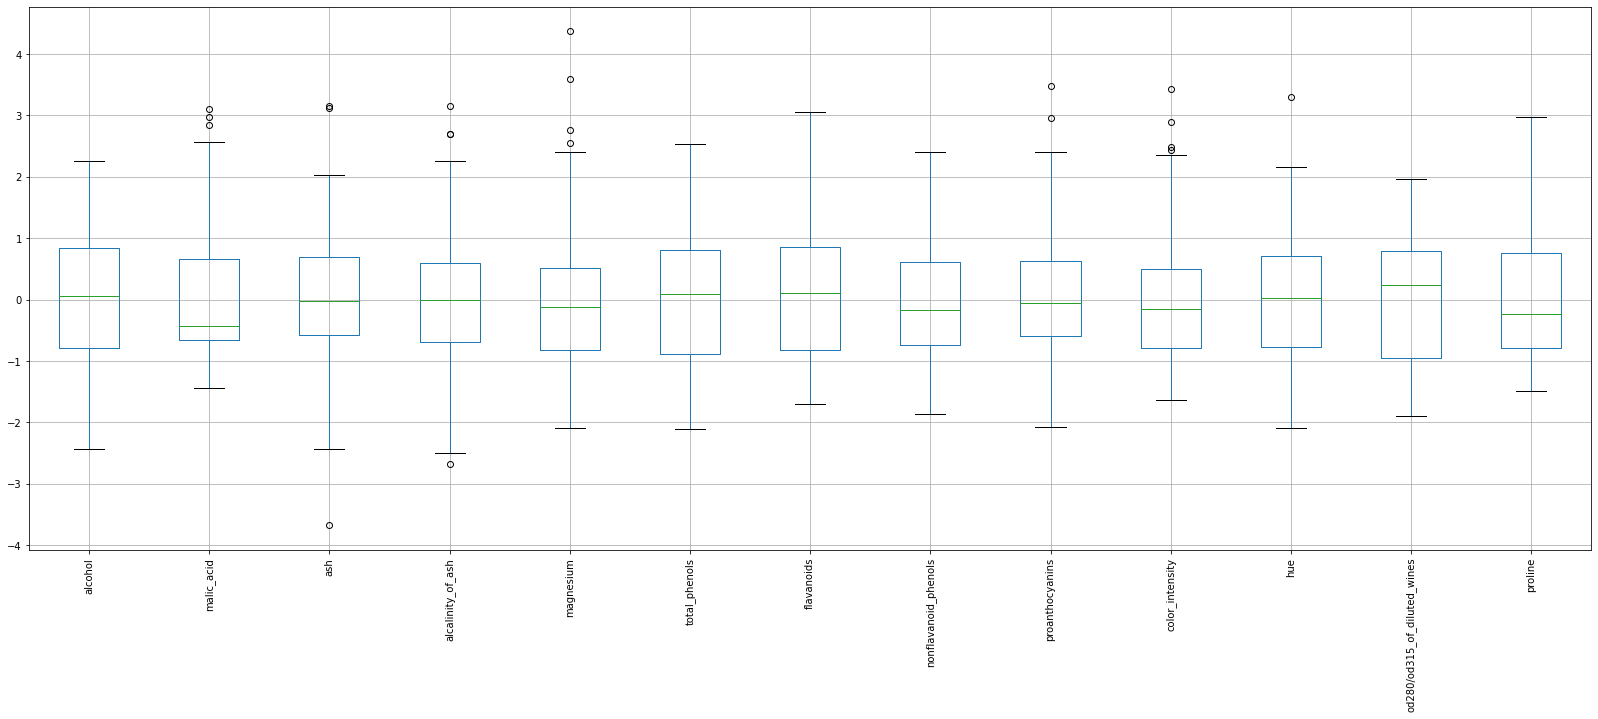

In [9]:
scaled_df.boxplot(figsize=(28,10))
plt.xticks(rotation = 90)
plt.show()

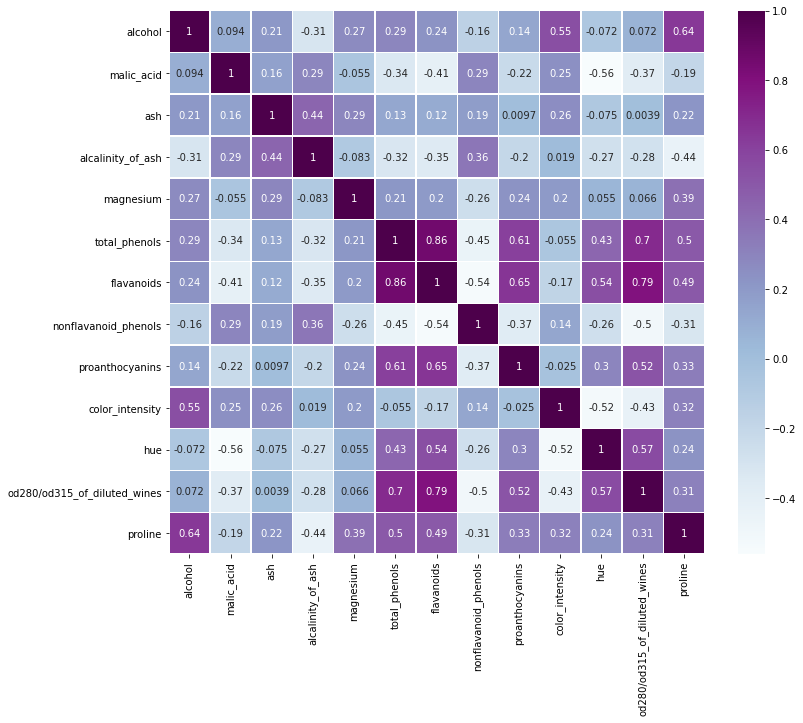

In [10]:
corr = scaled_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, linewidth=0.5,annot=True,cmap="BuPu")
plt.show()

In [11]:
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df,columns=df.columns) 

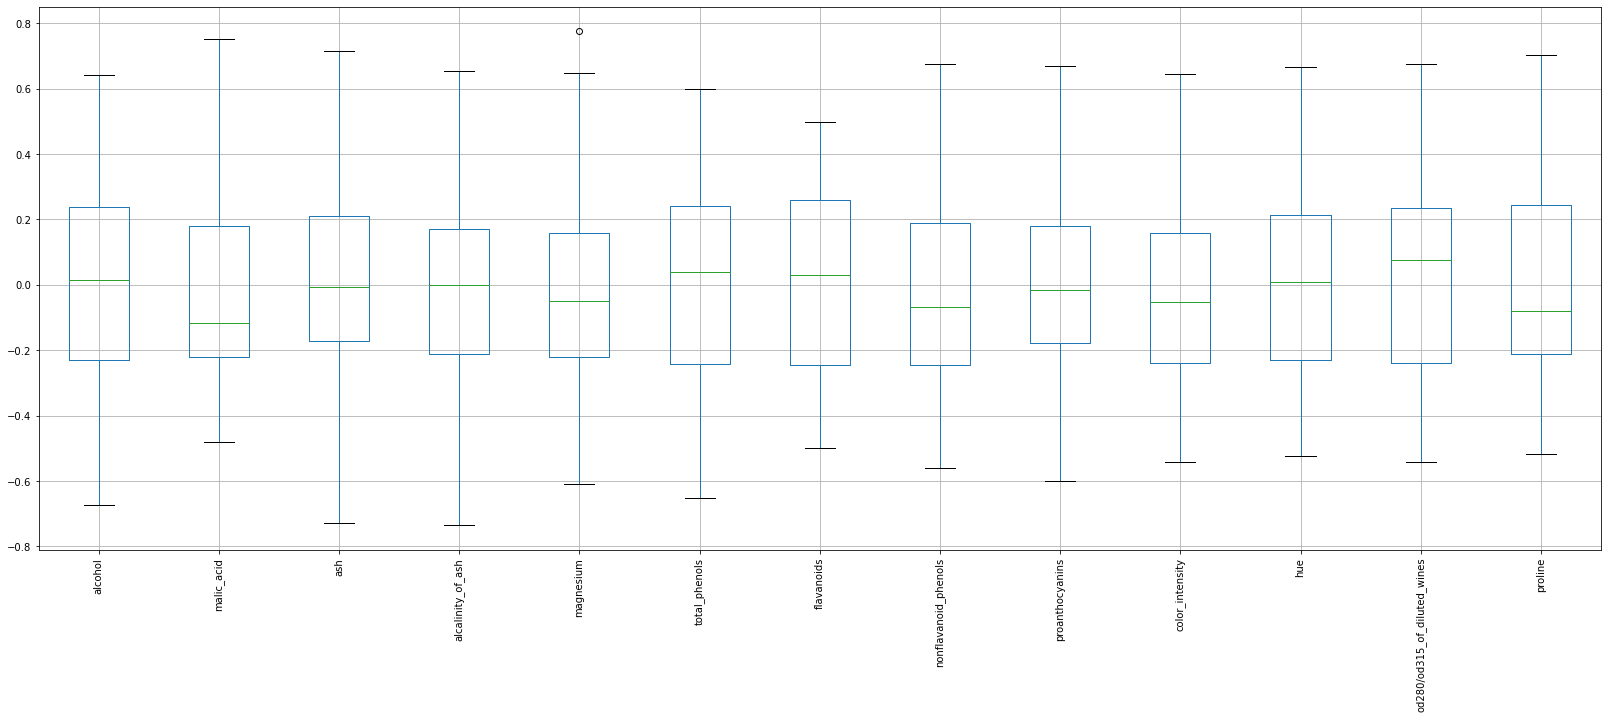

In [12]:
normalized_df.boxplot(figsize=(28,10))
plt.xticks(rotation = 90)
plt.show()

In [13]:
normalized_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196


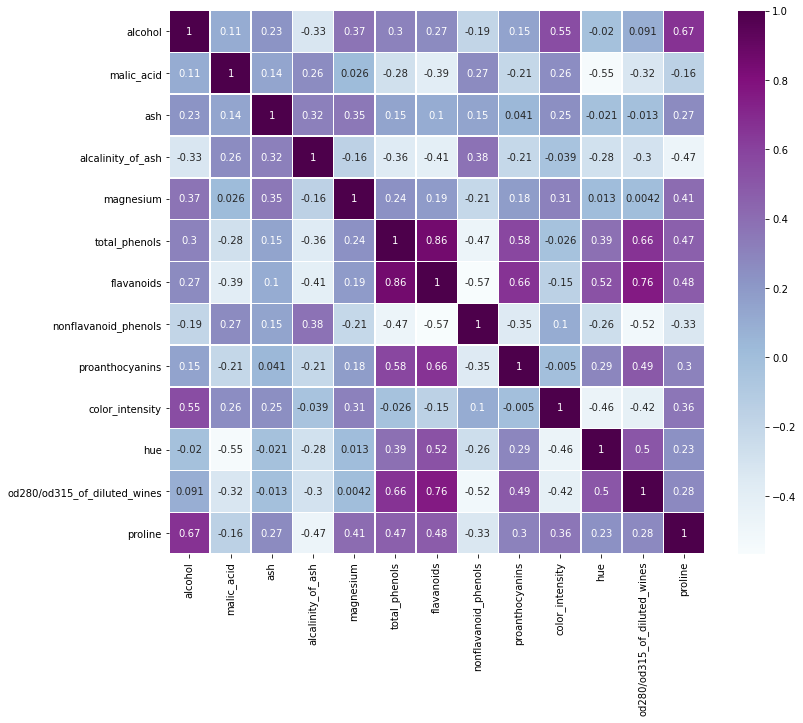

In [14]:
corr = normalized_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, linewidth=0.5,annot=True,cmap="BuPu")
plt.show()

# Análisis de Componentes Principales (PCA)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [15]:
from sklearn.decomposition import PCA

### Dos Componentes Principales.

In [16]:
pca = PCA(n_components = 2) 
x_principal = pca.fit_transform(normalized_df) 
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2'] 
x_principal.head()

,P1,P2
0,-0.832433,-0.318834
1,-0.639443,0.091947
2,-0.756882,-0.243317
3,-0.805447,-0.510057
4,-0.373903,-0.311604


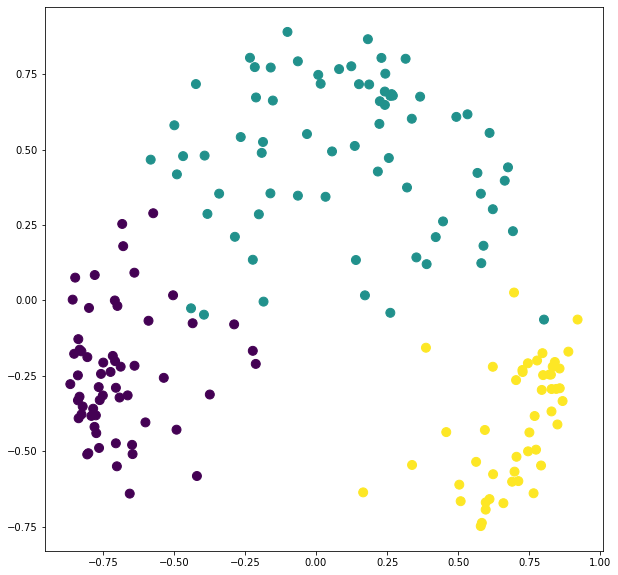

In [17]:
fig = plt.figure(figsize = (10,10))
plt.scatter(x_principal['P1'], x_principal['P2'], c = wine.target, s = 80)
plt.show()

In [18]:
pca.components_

array([[-0.19995859,  0.21483516, -0.03583603,  0.25059171, -0.14075692,
        -0.3942839 , -0.42049708,  0.30897799, -0.28884683,  0.03864312,
        -0.27036096, -0.36902382, -0.32867169],
       [-0.46787446, -0.25944656, -0.29903119,  0.03119847, -0.32430417,
        -0.01269628,  0.06357344, -0.05800528,  0.0194043 , -0.50757364,
         0.26661597,  0.22664747, -0.36081395]])

In [19]:
pd.DataFrame(pca.components_, index = ['P1', 'P2'], columns = df.columns).T

,P1,P2
alcohol,-0.199959,-0.467874
malic_acid,0.214835,-0.259447
ash,-0.035836,-0.299031
alcalinity_of_ash,0.250592,0.031198
magnesium,-0.140757,-0.324304
total_phenols,-0.394284,-0.012696
flavanoids,-0.420497,0.063573
nonflavanoid_phenols,0.308978,-0.058005
proanthocyanins,-0.288847,0.019404
color_intensity,0.038643,-0.507574


### Tres Componentes Principales.

In [20]:
pca = PCA(n_components = 3) 
x_principal = pca.fit_transform(normalized_df) 
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2', 'P3'] 
x_principal.head()

,P1,P2,P3
0,-0.832433,-0.318834,-0.013979
1,-0.639443,0.091947,-0.576623
2,-0.756882,-0.243317,0.328412
3,-0.805447,-0.510057,-0.006183
4,-0.373903,-0.311604,0.795363


https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

In [21]:
from mpl_toolkits.mplot3d import Axes3D

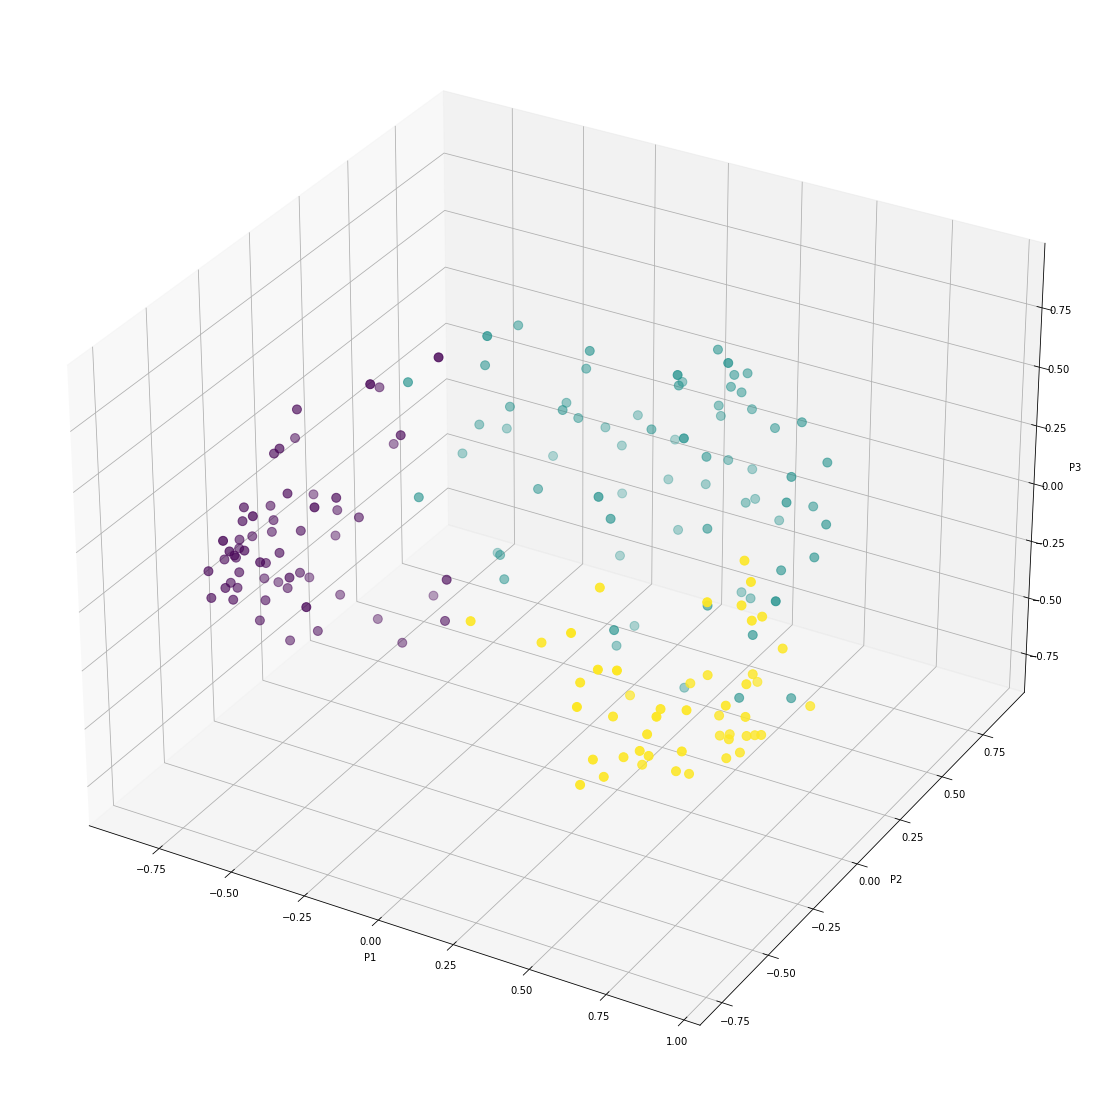

In [22]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection = '3d')

ax.scatter3D(x_principal['P1'], x_principal['P2'], x_principal['P3'], c = wine.target, s = 80)

ax.set_xlabel("P1")
ax.set_ylabel("P2")
ax.set_zlabel("P3")

plt.show()

PCA es una forma muy común de acelerar un algoritmo de machine learning. Además es buena opción para visualizar los datos.
Para usarlo es necesario estandarizar los datos primero porque PCA es afectado por escala.